## Assigment 2
#### In this assigment you are handed (you download) a dataset and perform ML on it.

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid", {"axes.facecolor": ".99"})

In [2]:
# https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls
path = 'Data/Happiness/'
data = pd.read_hdf(path + 'happiness.hdf5')
countries = data.loc[:, 'Country']
data

,Country,HappinessScore,DystopiaResidual,GDP,SocialSupport,LifeExpect,Freedom,Generosity,PerceptionOfCorruption
0,Finland,7.769,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,2.393,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.467,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.531,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,1.793,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,2.456,0.026,0.000,0.105,0.225,0.235,0.035


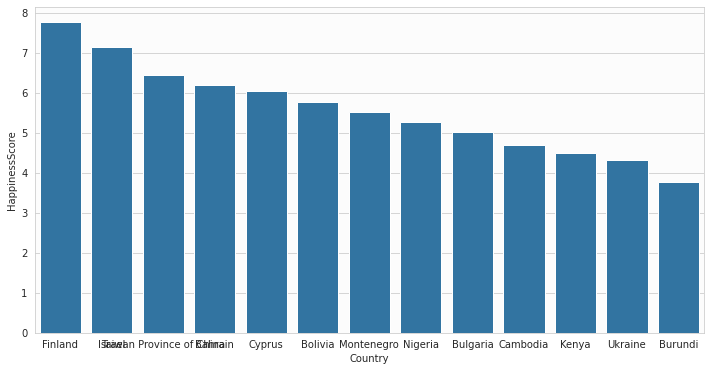

In [3]:
_ = sns.barplot(x=data.Country[::12], y=data.HappinessScore[::12], color='C0')

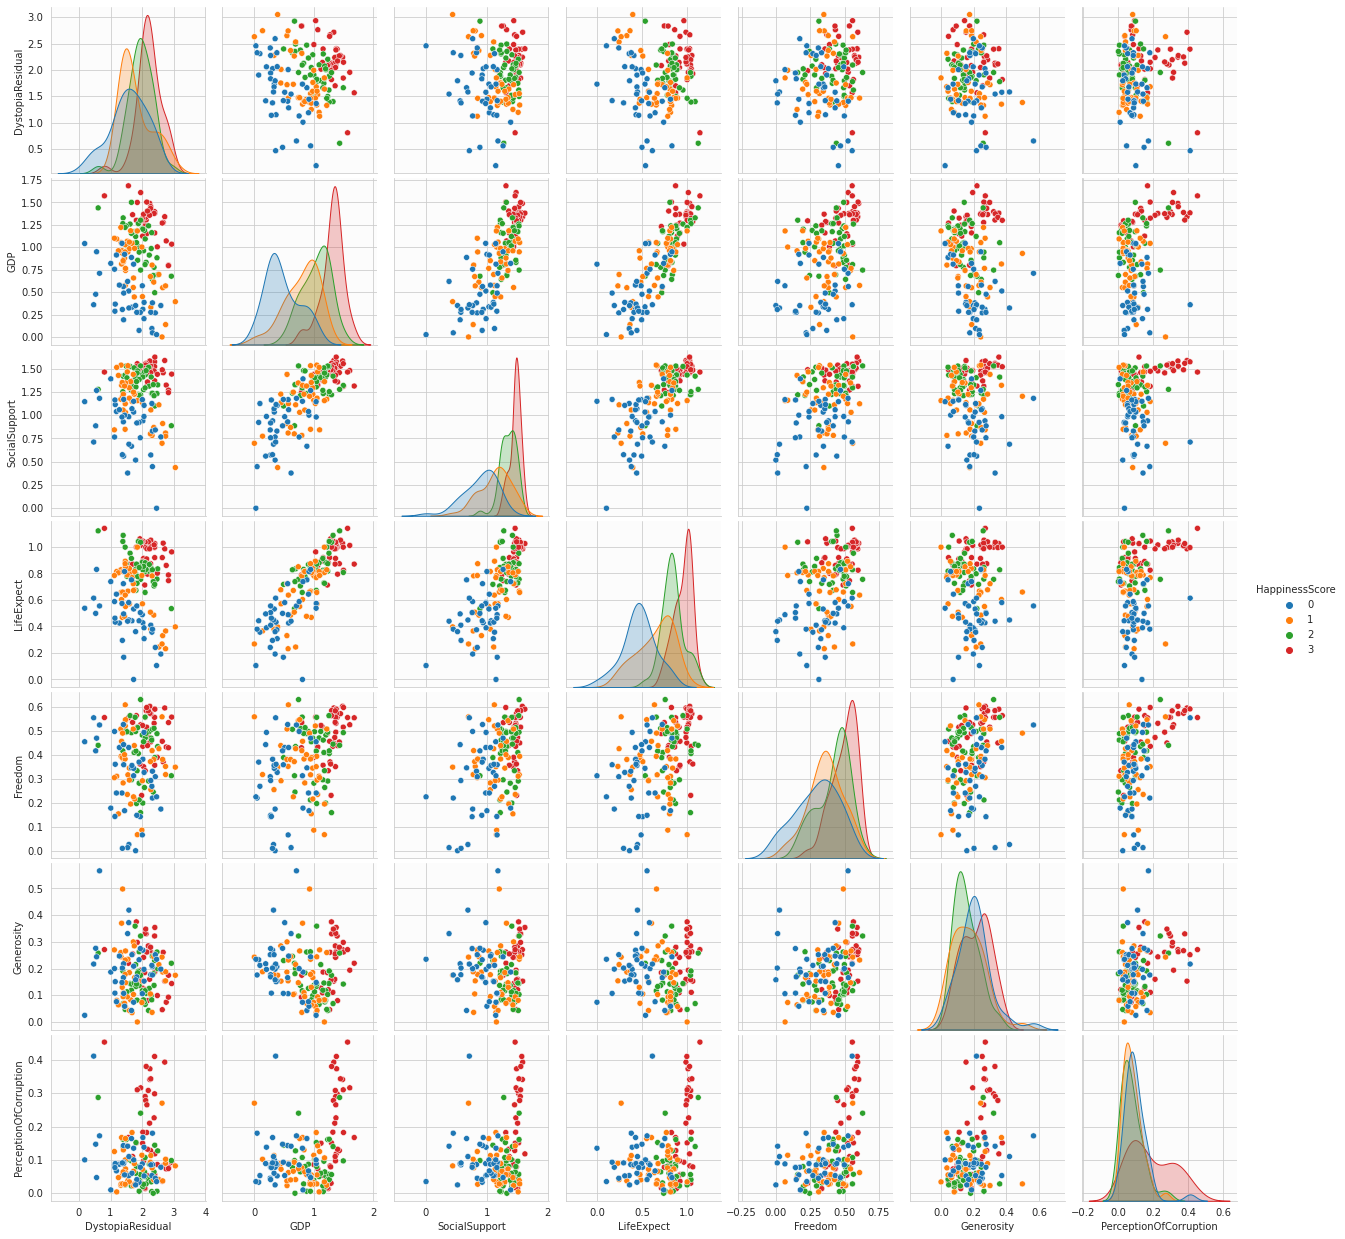

In [4]:
n = 4
y = data.loc[:, 'HappinessScore']
y_cat = pd.qcut(y, n, labels=range(n))
X = data.drop(columns=['Country', 'HappinessScore']).fillna(method='pad')

_ = sns.pairplot(pd.concat((X, y_cat), axis=1), hue='HappinessScore')

#### Perform train test splitting:

In [5]:
from sklearn.model_selection import train_test_split
random_state = 11

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, random_state=random_state)
y_train_cont = y.loc[X_train.index]
y_test_cont = y.loc[X_test.index]

#### Do classification: 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV

features = X_train.columns

rf = RandomForestClassifier(random_state=random_state) #.fit(X_train, y_train)

grid_params = {'max_depth':np.arange(50,301,50), 'n_estimators':[10, 50, 100, 300]}
grid = GridSearchCV(rf, grid_params, scoring='accuracy', cv=3).fit(X_train, y_train)
rf = grid.best_estimator_

tree = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)
lgreg = LogisticRegression().fit(X_train, y_train)

linreg = LinReg().fit(X_train, y_train)

linreg_cont = LinearRegression().fit(X_train, y_train_cont)

In [ ]:
pd.DataFrame().from_dict(grid.cv_results_)

In [7]:
class LinReg(LinearRegression):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def predict(self, X, y=None):
        preds = super().predict(X)
        return np.round(np.clip(preds, 0, n-1))

#### Evaluate the performance of your classifier:

In [9]:
from sklearn.metrics import classification_report, mean_squared_error

print(classification_report(y_test, tree.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))
print(classification_report(y_test, lgreg.predict(X_test)))
print(classification_report(y_test, linreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.36      0.57      0.44         7
           2       0.75      0.67      0.71         9
           3       0.82      0.90      0.86        10

    accuracy                           0.64        39
   macro avg       0.65      0.65      0.64        39
weighted avg       0.67      0.64      0.64        39

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.50      0.57      0.53         7
           2       0.70      0.78      0.74         9
           3       0.89      0.80      0.84        10

    accuracy                           0.74        39
   macro avg       0.73      0.73      0.73        39
weighted avg       0.76      0.74      0.75        39

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.

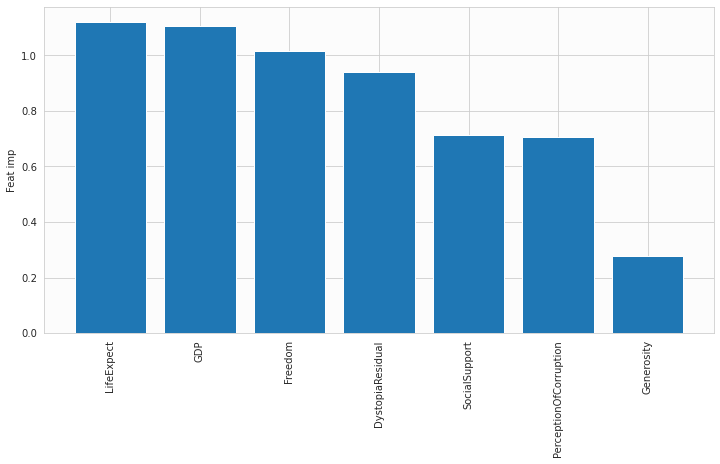

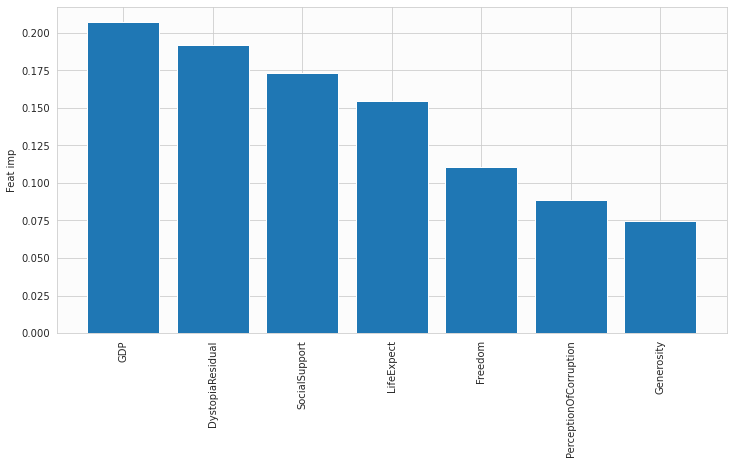

In [236]:
def plot_feat_imp(feat_imp):
    
    _, ax = plt.subplots()
    feat_imp = feat_imp[feat_imp[:, 1].argsort()][::-1]

    xticks = np.arange(len(feat_imp))
    ax.bar(xticks, feat_imp[:, 1])
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels=feat_imp[:, 0], rotation=90)
    ax.set_ylabel('Feat imp')
    plt.show()
    
feat_imp = np.vstack((features, linreg.coef_)).T
plot_feat_imp(feat_imp)

feat_imp = np.vstack((features, rf.feature_importances_)).T
plot_feat_imp(feat_imp)
